In [14]:
import matplotlib.pyplot as plt
import numpy as np

def pad_accuracies(accuracies):
    max_len = max(len(task) for task in accuracies)
    padded_accuracies = [task + [None] * (max_len - len(task)) for task in accuracies]
    return np.array(padded_accuracies, dtype=np.float32)

def plot_task_accuracies_roundwise(sgd_accuracies, bgd_accuracies):
 
    sgd_accuracies = pad_accuracies(sgd_accuracies)
    bgd_accuracies = pad_accuracies(bgd_accuracies)
    
    plt.figure(figsize=(10, 6))

    colors = plt.cm.Set1(np.linspace(0, 1, sgd_accuracies.shape[1]))
    for i in range(0, sgd_accuracies.shape[1]): # 0 - 9
        # print(f'sgd_accuracies : {sgd_accuracies[:, i]}')
        task_accuracies_over_rounds = sgd_accuracies[:, i]
        # print(task_accuracies_over_rounds)
        plt.plot(range(1, sgd_accuracies.shape[0] + 1), task_accuracies_over_rounds, marker='o', linestyle='--', color=colors[i], label=f'CFL_SGD Task {i+1}', linewidth=2.5)

   
    for i in range(0, bgd_accuracies.shape[1]):
        #print(f'bgd_accuracies : {bgd_accuracies[:, i]}')
        plt.plot(range(1, bgd_accuracies.shape[0] + 1), bgd_accuracies[:, i], marker='s', color=colors[i], label=f'CFL_BGD Task {i+1}', linewidth=2.5)
    
    plt.title(f'Task wise Accuracies', fontweight='bold')
    plt.xlabel('Rounds', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')

    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:

def plot_average_accuracies_over_rounds(sgd_accuracies, bgd_accuracies):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f"sgd_means: {sgd_means}")
    plt.plot(tasks, sgd_means, marker='o', label='CFL_SGD',linestyle='--', linewidth=2.5)
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f"bgd_means: {bgd_means}")
    plt.plot(tasks, bgd_means, marker='s', label='CFL_BGD', linewidth=2.5)
    
    plt.xlabel('Task ID', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
    # plt.title(f'Average Accuracies per round for SGD and BGD - FedAvg BGD ')
    plt.title(f'Average Accuracy across tasks', fontweight='bold')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'{i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))], fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:

def plot_average_accuracies_over_rounds_new(sgd_accuracies, bgd_accuracies,new_bgd_accuracies_0_1, new_bgd_accuracies_0_3):
    plt.figure(figsize=(10, 6))
    tasks = range(0, len(sgd_accuracies))
    
    sgd_means = [np.mean(np.array(task_accs)) for task_accs in sgd_accuracies]
    print(f"sgd_means: {sgd_means}")
    plt.plot(tasks, sgd_means, marker='o', label='CFL_SGD',linestyle='--', linewidth=2.5)
    
    bgd_means = [np.mean(np.array(task_accs)) for task_accs in bgd_accuracies]
    print(f"bgd_means: {bgd_means}")
    plt.plot(tasks, bgd_means, marker='s', label='CFL_OLD_BGD', linewidth=2.5)

    new_bgd_0_1_means = [np.mean(np.array(task_accs)) for task_accs in new_bgd_accuracies_0_1]
    print(f"new_bgd_means_0.1: {new_bgd_0_1_means}")
    plt.plot(tasks, new_bgd_0_1_means, marker='*', label='CFL_NEW_BGD_0.1_alpha_mg', linewidth=2.5)

    new_bgd_0_3_means = [np.mean(np.array(task_accs)) for task_accs in new_bgd_accuracies_0_3]
    print(f"new_bgd_means_0.3: {new_bgd_0_3_means}")
    plt.plot(tasks, new_bgd_0_3_means, marker='>', label='CFL_NEW_BGD_0.3_alpha_mg', linewidth=2.5)
    
    plt.xlabel('Task ID', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
    # plt.title(f'Average Accuracies per round for SGD and BGD - FedAvg BGD ')
    plt.title(f'Average Accuracy across tasks', fontweight='bold')
    plt.xticks(range(max(len(sgd_accuracies), len(bgd_accuracies))), [f'{i+1}' for i in range(max(len(sgd_accuracies), len(bgd_accuracies)))], fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.legend(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
def calculate_forgetting(sgd_task_accuracies, bgd_task_accuracies):
    s = len(sgd_task_accuracies)

    print("sgd_avg_acc_after_last_task", round(np.mean(sgd_task_accuracies[s-1]), 2))
    print("bgd_avg_acc_after_last_task", round(np.mean(bgd_task_accuracies[s-1]), 2))

    sgd_forgetting = []
    for i in range(s-1):
        sgd_forgetting.append(sgd_task_accuracies[i][i]-sgd_task_accuracies[s-1][i])

    bgd_forgetting = []
    for i in range(s-1):
        bgd_forgetting.append(bgd_task_accuracies[i][i]-bgd_task_accuracies[s-1][i])

    return round(np.mean(sgd_forgetting),2), round(np.mean(bgd_forgetting), 2)

# **Split MNIST**

## **IID**

sgd_means: [99.669, 88.66499999999999, 87.05466666666666, 55.0385, 59.774]
bgd_means: [99.574, 87.92949999999999, 87.01400000000001, 62.06875, 61.105]
new_bgd_means_0.1: [98.44, 83.971, 76.86999999999999, 68.93025, 63.970600000000005]
new_bgd_means_0.3: [97.92, 89.10900000000001, 76.52966666666667, 79.48825, 69.2938]


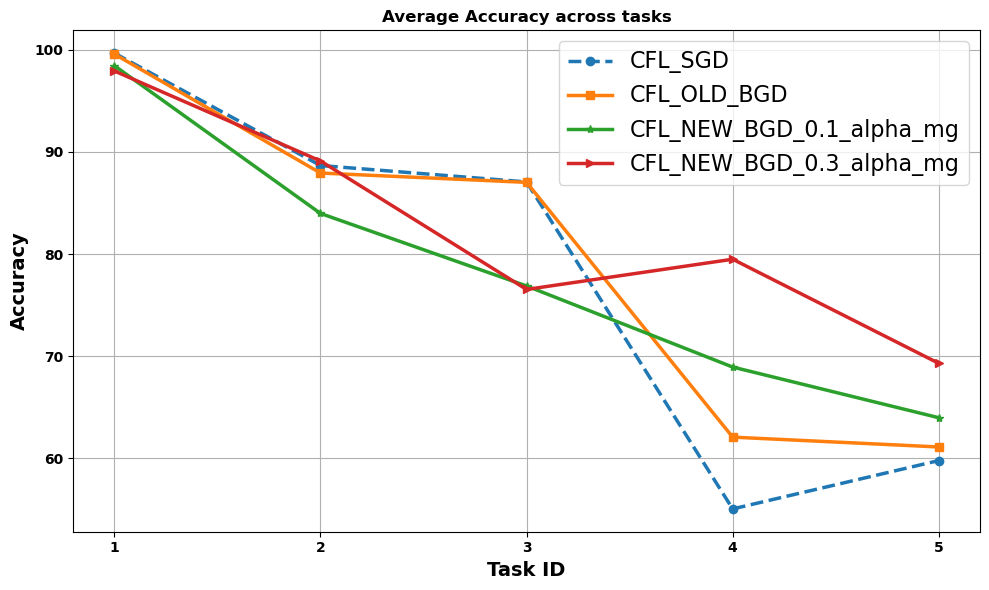

In [18]:
tasks_5_bgd_sgd_iid_split_mnist_alpha_100000 = {'bgd_new_update_0.1' : [[98.44],[77.589, 90.353],[56.643, 83.252, 90.715], [56.548, 73.066, 48.826, 97.281],[43.83, 63.663, 21.078, 95.77, 95.512]],
                                                        'bgd_new_update_0.3' : [[97.92],[91.489, 86.729], [61.04, 81.783, 86.766],[67.518, 86.533, 67.93, 95.972],[46.856, 73.017, 36.98, 97.281, 92.335]],
                              'bgd_old_update' : [[99.574],[78.014, 97.845],[74.657, 89.373, 97.012], [47.139, 68.56, 33.885, 98.691],[34.326, 58.031, 18.356, 96.123, 98.689]],
                              'sgd' : [[99.669],[77.967, 99.363],[71.348, 91.577, 98.239],[44.539, 60.578, 15.742, 99.295],[28.322, 60.774, 13.501, 96.878, 99.395]]}


plot_average_accuracies_over_rounds_new(tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_old_update'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.1'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.3'])
# plot_task_accuracies_roundwise(tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.1'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['ngd_new_update_0.3'])
# sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_old_update'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.1'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.3'])
# sgd_avg_forgetting, bgd_avg_forgetting

sgd_means: [99.574, 93.674, 88.76700000000001, 56.1165, 60.29879999999999]
bgd_means: [99.338, 92.2795, 88.633, 61.47, 61.14459999999999]
new_bgd_means_0.1: [95.981, 81.84899999999999, 76.13233333333334, 67.437, 63.21320000000001]
new_bgd_means_0.3: [94.846, 87.82300000000001, 74.49733333333334, 78.71225, 68.4286]


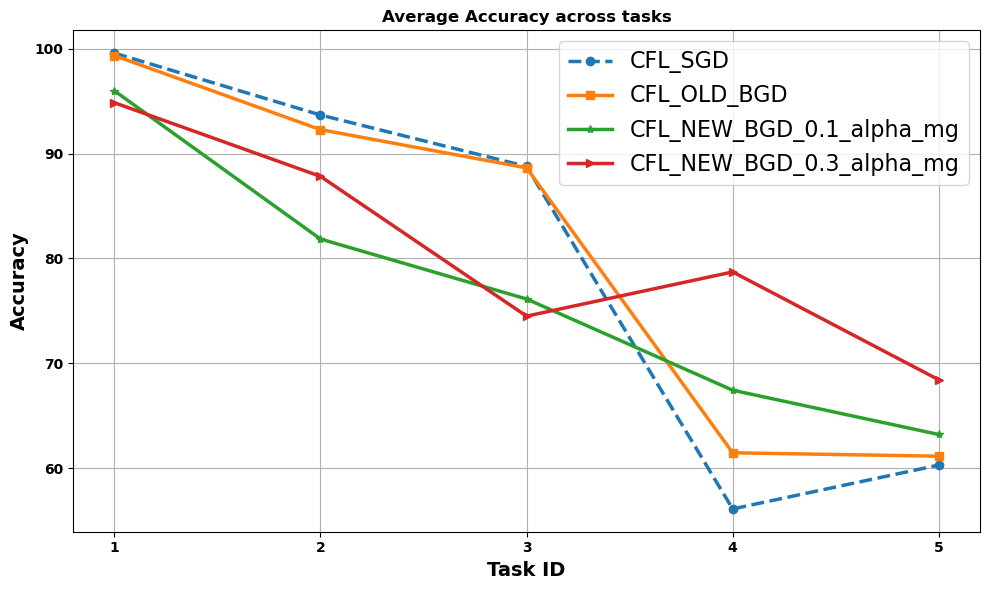

In [19]:
tasks_5_bgd_sgd_niid_split_mnist_alpha_0_01 = {'bgd_new_update_0.1' : [[95.981],[74.374, 89.324], [55.461, 83.448, 89.488], [52.482, 71.939, 48.399, 96.928], [43.31, 59.647, 20.971, 96.324, 95.814]],
                                                        'bgd_new_update_0.3' : [[94.846],[88.085, 87.561],[58.014, 79.726, 85.752],[63.168, 86.876, 68.783, 96.022],[41.797, 70.078, 39.594, 97.331, 93.343]],
                              'bgd_old_update' : [[99.338],[86.714, 97.845], [76.927, 92.067, 96.905], [47.187, 69.05, 31.003, 98.64],[33.475, 59.647, 17.236, 96.777, 98.588]],
                              'sgd' : [[99.574],[88.132, 99.216], [74.326, 93.683, 98.292],[48.889, 60.333, 15.848, 99.396],[29.267, 61.312, 14.088, 97.382, 99.445]]}


plot_average_accuracies_over_rounds_new(tasks_5_bgd_sgd_niid_split_mnist_alpha_0_01['sgd'], tasks_5_bgd_sgd_niid_split_mnist_alpha_0_01['bgd_old_update'],tasks_5_bgd_sgd_niid_split_mnist_alpha_0_01['bgd_new_update_0.1'],tasks_5_bgd_sgd_niid_split_mnist_alpha_0_01['bgd_new_update_0.3'])
# plot_task_accuracies_roundwise(tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.1'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['ngd_new_update_0.3'])
# sgd_avg_forgetting, bgd_avg_forgetting = calculate_forgetting(tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['sgd'], tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_old_update'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.1'],tasks_5_bgd_sgd_iid_split_mnist_alpha_100000['bgd_new_update_0.3'])
# sgd_avg_forgetting, bgd_avg_forgetting